In [1]:
import os
import sys
import time
import math
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt

from dbn import DBN, fit_mnist_dbn
from neural_net import WarmUpMLPClassifier
from rbm import RBM, binary_data, shuffle_corpus

In [2]:
def plot_images(images, path = None, cols=3, cmap='gray'):
    rows = (len(images) + cols - 1) // cols
    fig, ax = plt.subplots(rows, cols)
    for i, image in enumerate(images):
        ax[i//cols][i%cols].imshow(image, cmap=cmap)
        ax[i//cols][i%cols].get_xaxis().set_ticks([])
        ax[i//cols][i%cols].get_yaxis().set_ticks([])
    for i in range(len(images), rows*cols):
        ax[i//cols][i%cols].get_xaxis().set_ticks([])
        ax[i//cols][i%cols].get_yaxis().set_ticks([])
        ax[i//cols][i%cols].axis('off')
    fig.set_size_inches(cols*10, rows*10)
    if path is not None:
        plt.savefig(path)
    plt.show()

# Load MNIST dataset

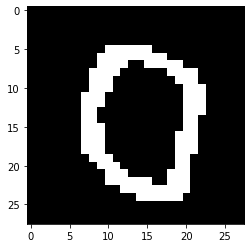

In [3]:
np.seterr(all='raise')
train_data = np.genfromtxt('./data/digitstrain.txt', delimiter=",")
train_X = train_data[:, :-1] 
train_Y = train_data[:, -1]
train_X = binary_data(train_X)

valid_data = np.genfromtxt('./data/digitsvalid.txt', delimiter=",")
valid_X = valid_data[:, :-1]
valid_X = binary_data(valid_X)
valid_Y = valid_data[:, -1]

test_data = np.genfromtxt('./data/digitstest.txt', delimiter=",")
test_X = test_data[:, :-1]
test_X = binary_data(test_X)
test_Y = test_data[:, -1]

plt.imshow(train_X[100].reshape(28, 28), cmap='gray')

In [ ]:
np.unique(,return_counts=True)

In [ ]:

for i in range(0,1000):
    plt.imshow(train_X[i].reshape(28, 28), cmap='gray')
    plt.show()

# 0) Local Autograder tests

In [ ]:
!pip install gradescope-utils

In [ ]:
os.getcwd()

In [ ]:
%run tests/run_tests.py

# 1) RBM Task

Two files, `rbm.py` and `dbn.py`, are provided. Only `rbm.py` will be evaluated in autograder, but you need to implement and submit both. You should read the instructions on top of these files, and the docstrings very carefully. You can change anything as you see fit in \texttt{dbn.py}, as this file will not be autograded.

We recommend you to complete and use the <span style="color:DarkOrange"> RBM.fit </span>, <span style="color:DarkOrange"> WarmUpMLPClassifier.fit </span> and <span style="color:DarkOrange"> DBN.fit </span> methods.

## a) Training RBM

Try the RBM model with gibbs steps $k$ as 1, 3, and 5. For each $k$, plot reconstruction error against the epoch number for training and validation on one plot. So you should include 3 plots here, each contains two curves for training and validation. How does $k$ affect training convergence of the model?

In [4]:
n_hidden = 100
ks = [1, 3, 5]
lr = 0.01
max_epochs=40

In [23]:

## This code will load the results of different k values in a dictionary which can be retrived to plot the graphs. 
result = {}
rbms = {}
for i in ks:
    rbm=RBM(n_visible=784, n_hidden=n_hidden, 
              k=i, lr=lr, max_epochs=40)
    result[i]=rbm.fit(X=train_X, valid_X=valid_X)

# Finish the training process

Epoch 1 :: 	 Train Error 8.7557                   :: Valid Error 8.8564
Epoch 2 :: 	 Train Error 8.1789                   :: Valid Error 8.2839
Epoch 3 :: 	 Train Error 7.8375                   :: Valid Error 7.9907
Epoch 4 :: 	 Train Error 7.6011                   :: Valid Error 7.7500
Epoch 5 :: 	 Train Error 7.4457                   :: Valid Error 7.6156
Epoch 6 :: 	 Train Error 7.2929                   :: Valid Error 7.4968
Epoch 7 :: 	 Train Error 7.1669                   :: Valid Error 7.3941
Epoch 8 :: 	 Train Error 7.0627                   :: Valid Error 7.2861
Epoch 9 :: 	 Train Error 7.0082                   :: Valid Error 7.2160
Epoch 10 :: 	 Train Error 6.9294                   :: Valid Error 7.1977
Epoch 11 :: 	 Train Error 6.8727                   :: Valid Error 7.1153
Epoch 12 :: 	 Train Error 6.8115                   :: Valid Error 7.0991
Epoch 13 :: 	 Train Error 6.7701                   :: Valid Error 7.0422
Epoch 14 :: 	 Train Error 6.7223                   :: Valid 

Epoch 34 :: 	 Train Error 7.1401                   :: Valid Error 7.5242
Epoch 35 :: 	 Train Error 7.1659                   :: Valid Error 7.5311
Epoch 36 :: 	 Train Error 7.1411                   :: Valid Error 7.4929
Epoch 37 :: 	 Train Error 7.0964                   :: Valid Error 7.4692
Epoch 38 :: 	 Train Error 7.0738                   :: Valid Error 7.4404
Epoch 39 :: 	 Train Error 7.0740                   :: Valid Error 7.4477
Epoch 40 :: 	 Train Error 7.0810                   :: Valid Error 7.4662





In [ ]:

result[1][0]

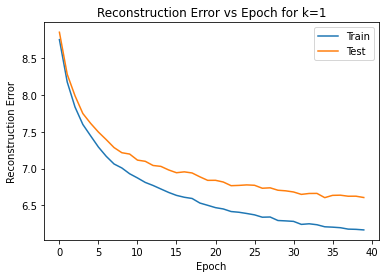

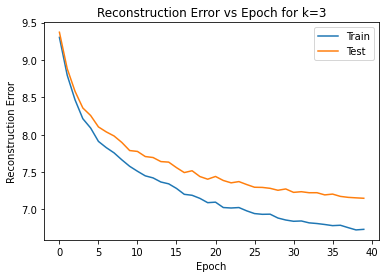

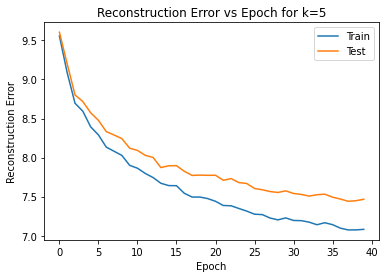

In [24]:
##print the graphs from for part 1
for i in ks:
    plt.plot(range(40),result[i][0],label='Train')
    plt.plot(range(40),result[i][1],label='Test')
    plt.title('Reconstruction Error vs Epoch for k='+str(i))
    plt.xlabel('Epoch')
    plt.ylabel('Reconstruction Error')
    plt.legend()
    plt.show()


## b) Visualizing and understanding learned parameters

Choose one model that you like, and visualize its learned $W$ as 100 images that are 28-by-28 in pixel. Plot all of them in one figure. What are being plotted here? Do they exhibit any structure?

In [6]:
##To train the model 
rbm_b=RBM(n_visible=784, n_hidden=n_hidden, 
              k=1, lr=lr, max_epochs=100)
train_re,val_re=rbm_b.fit(X=train_X, valid_X=valid_X)
## Parameters hidden =100 k=1 lr =0.01 max_epoch=40

Epoch 1 :: 	 Train Error 8.7407                   :: Valid Error 8.8121
Epoch 2 :: 	 Train Error 8.1507                   :: Valid Error 8.2704
Epoch 3 :: 	 Train Error 7.8179                   :: Valid Error 7.9536
Epoch 4 :: 	 Train Error 7.6089                   :: Valid Error 7.7614
Epoch 5 :: 	 Train Error 7.4484                   :: Valid Error 7.6234
Epoch 6 :: 	 Train Error 7.3343                   :: Valid Error 7.5230
Epoch 7 :: 	 Train Error 7.2279                   :: Valid Error 7.4464
Epoch 8 :: 	 Train Error 7.1123                   :: Valid Error 7.3404
Epoch 9 :: 	 Train Error 7.0266                   :: Valid Error 7.2798
Epoch 10 :: 	 Train Error 6.9445                   :: Valid Error 7.2036
Epoch 11 :: 	 Train Error 6.8664                   :: Valid Error 7.1421
Epoch 12 :: 	 Train Error 6.8189                   :: Valid Error 7.1318
Epoch 13 :: 	 Train Error 6.7816                   :: Valid Error 7.0788
Epoch 14 :: 	 Train Error 6.7381                   :: Valid 

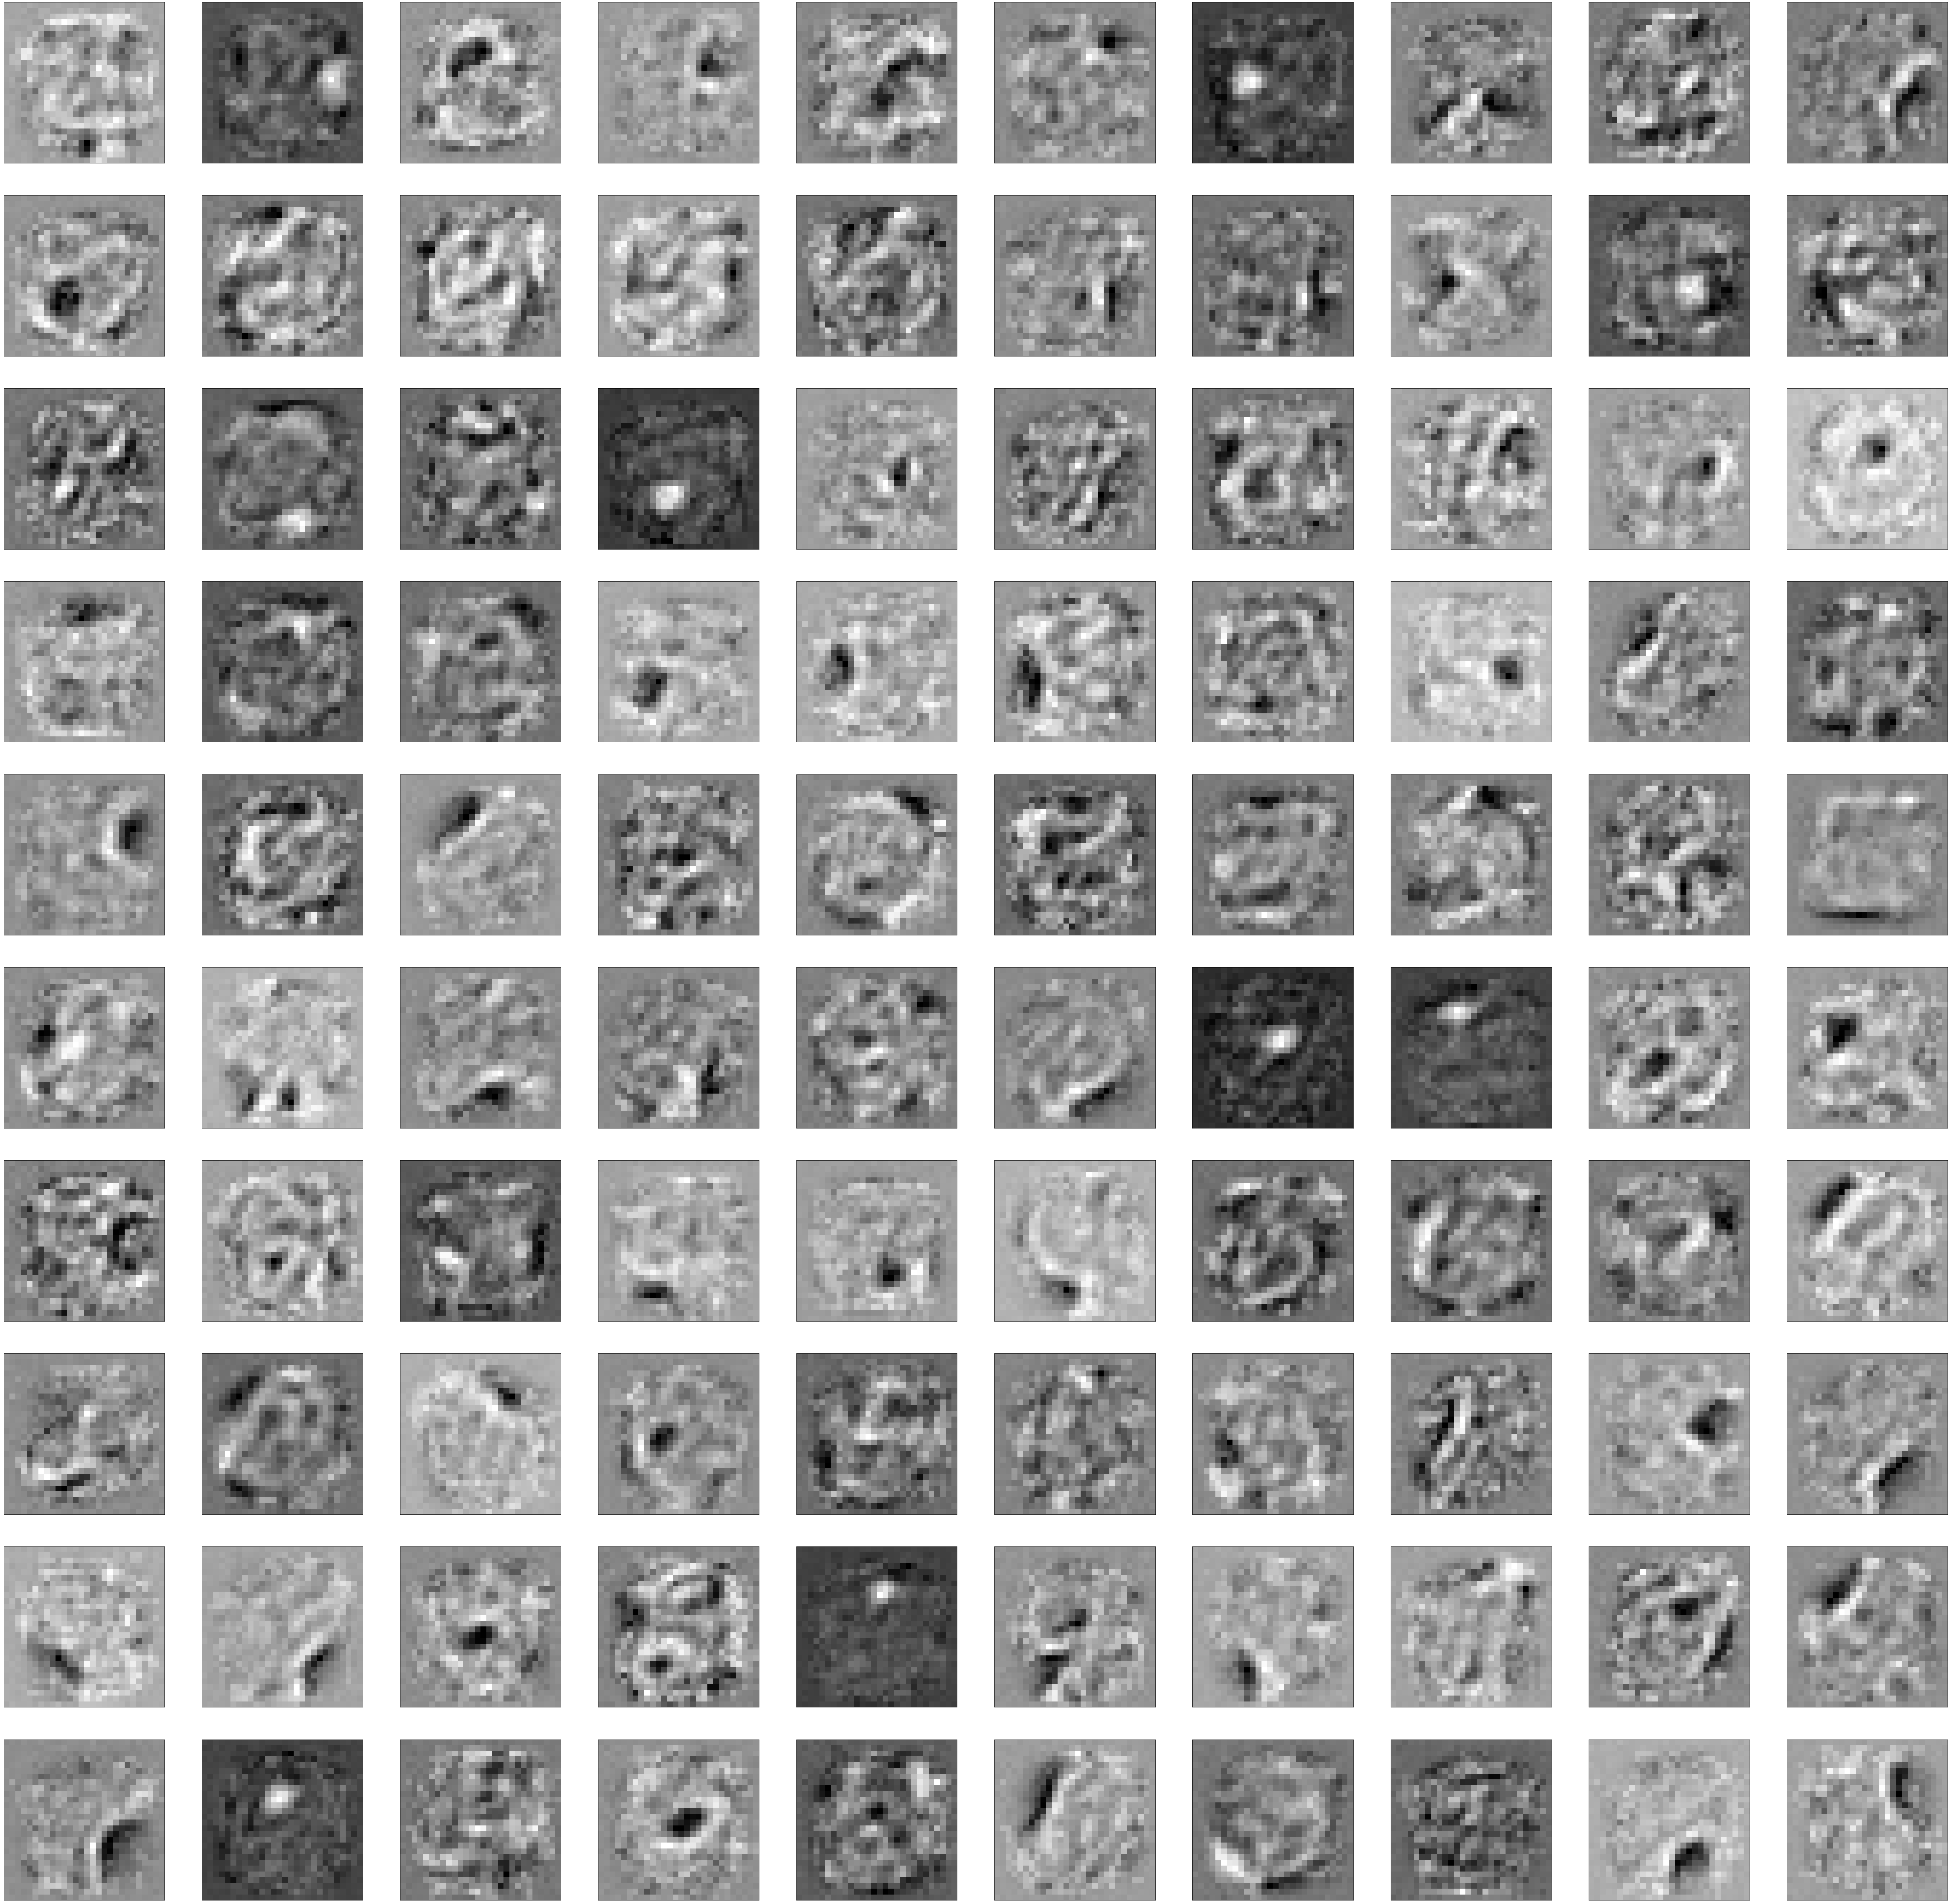

In [7]:
plot_images([rbm_b.W[i].reshape(28,28) for i in range(0,100)], path = None, cols=10, cmap='gray')

## c) Generation

Set $k>1000$ for this task. Display the 100 generated samples for digit images in one figure. Do they look like handwritten digits? What if you retrain your RBM on only 3 digits, say $\textbf{1, 2}$ and $\textbf{3}$? If you train with $k=1$ vs $k=5$, do you see a difference in generated figures?

In [8]:
##1.To train the model with k=1 and then find the inference for the value of k>1001 for the above trained model and then print the images. 

input_c=np.random.binomial(n=1, p=0.1,size=train_X.shape)
rbm_c_1=RBM(n_visible=784, n_hidden=n_hidden, 
              k=1, lr=lr, max_epochs=100)
train_re_1,val_re_1=rbm_c_1.fit(X=train_X, valid_X=valid_X)
sample_c1=[]
for i in range(0,100):
    h0, v0, h_sample, v_sample, h_prob, v_prob=rbm_c_1.gibbs_k(input_c[i], k=1001)
    sample_c1.append(v_prob)
## Parameters hidden =100 k=1,1001 lr =0.01 max_epoch=40  digits 0-9  

Epoch 1 :: 	 Train Error 8.7470                   :: Valid Error 8.8201
Epoch 2 :: 	 Train Error 8.1307                   :: Valid Error 8.2350
Epoch 3 :: 	 Train Error 7.7935                   :: Valid Error 7.9270
Epoch 4 :: 	 Train Error 7.6115                   :: Valid Error 7.7690
Epoch 5 :: 	 Train Error 7.4273                   :: Valid Error 7.6004
Epoch 6 :: 	 Train Error 7.2882                   :: Valid Error 7.4852
Epoch 7 :: 	 Train Error 7.1865                   :: Valid Error 7.4022
Epoch 8 :: 	 Train Error 7.1023                   :: Valid Error 7.3546
Epoch 9 :: 	 Train Error 7.0260                   :: Valid Error 7.2686
Epoch 10 :: 	 Train Error 6.9439                   :: Valid Error 7.2028
Epoch 11 :: 	 Train Error 6.8525                   :: Valid Error 7.1577
Epoch 12 :: 	 Train Error 6.8123                   :: Valid Error 7.1117
Epoch 13 :: 	 Train Error 6.7514                   :: Valid Error 7.0578
Epoch 14 :: 	 Train Error 6.6811                   :: Valid 

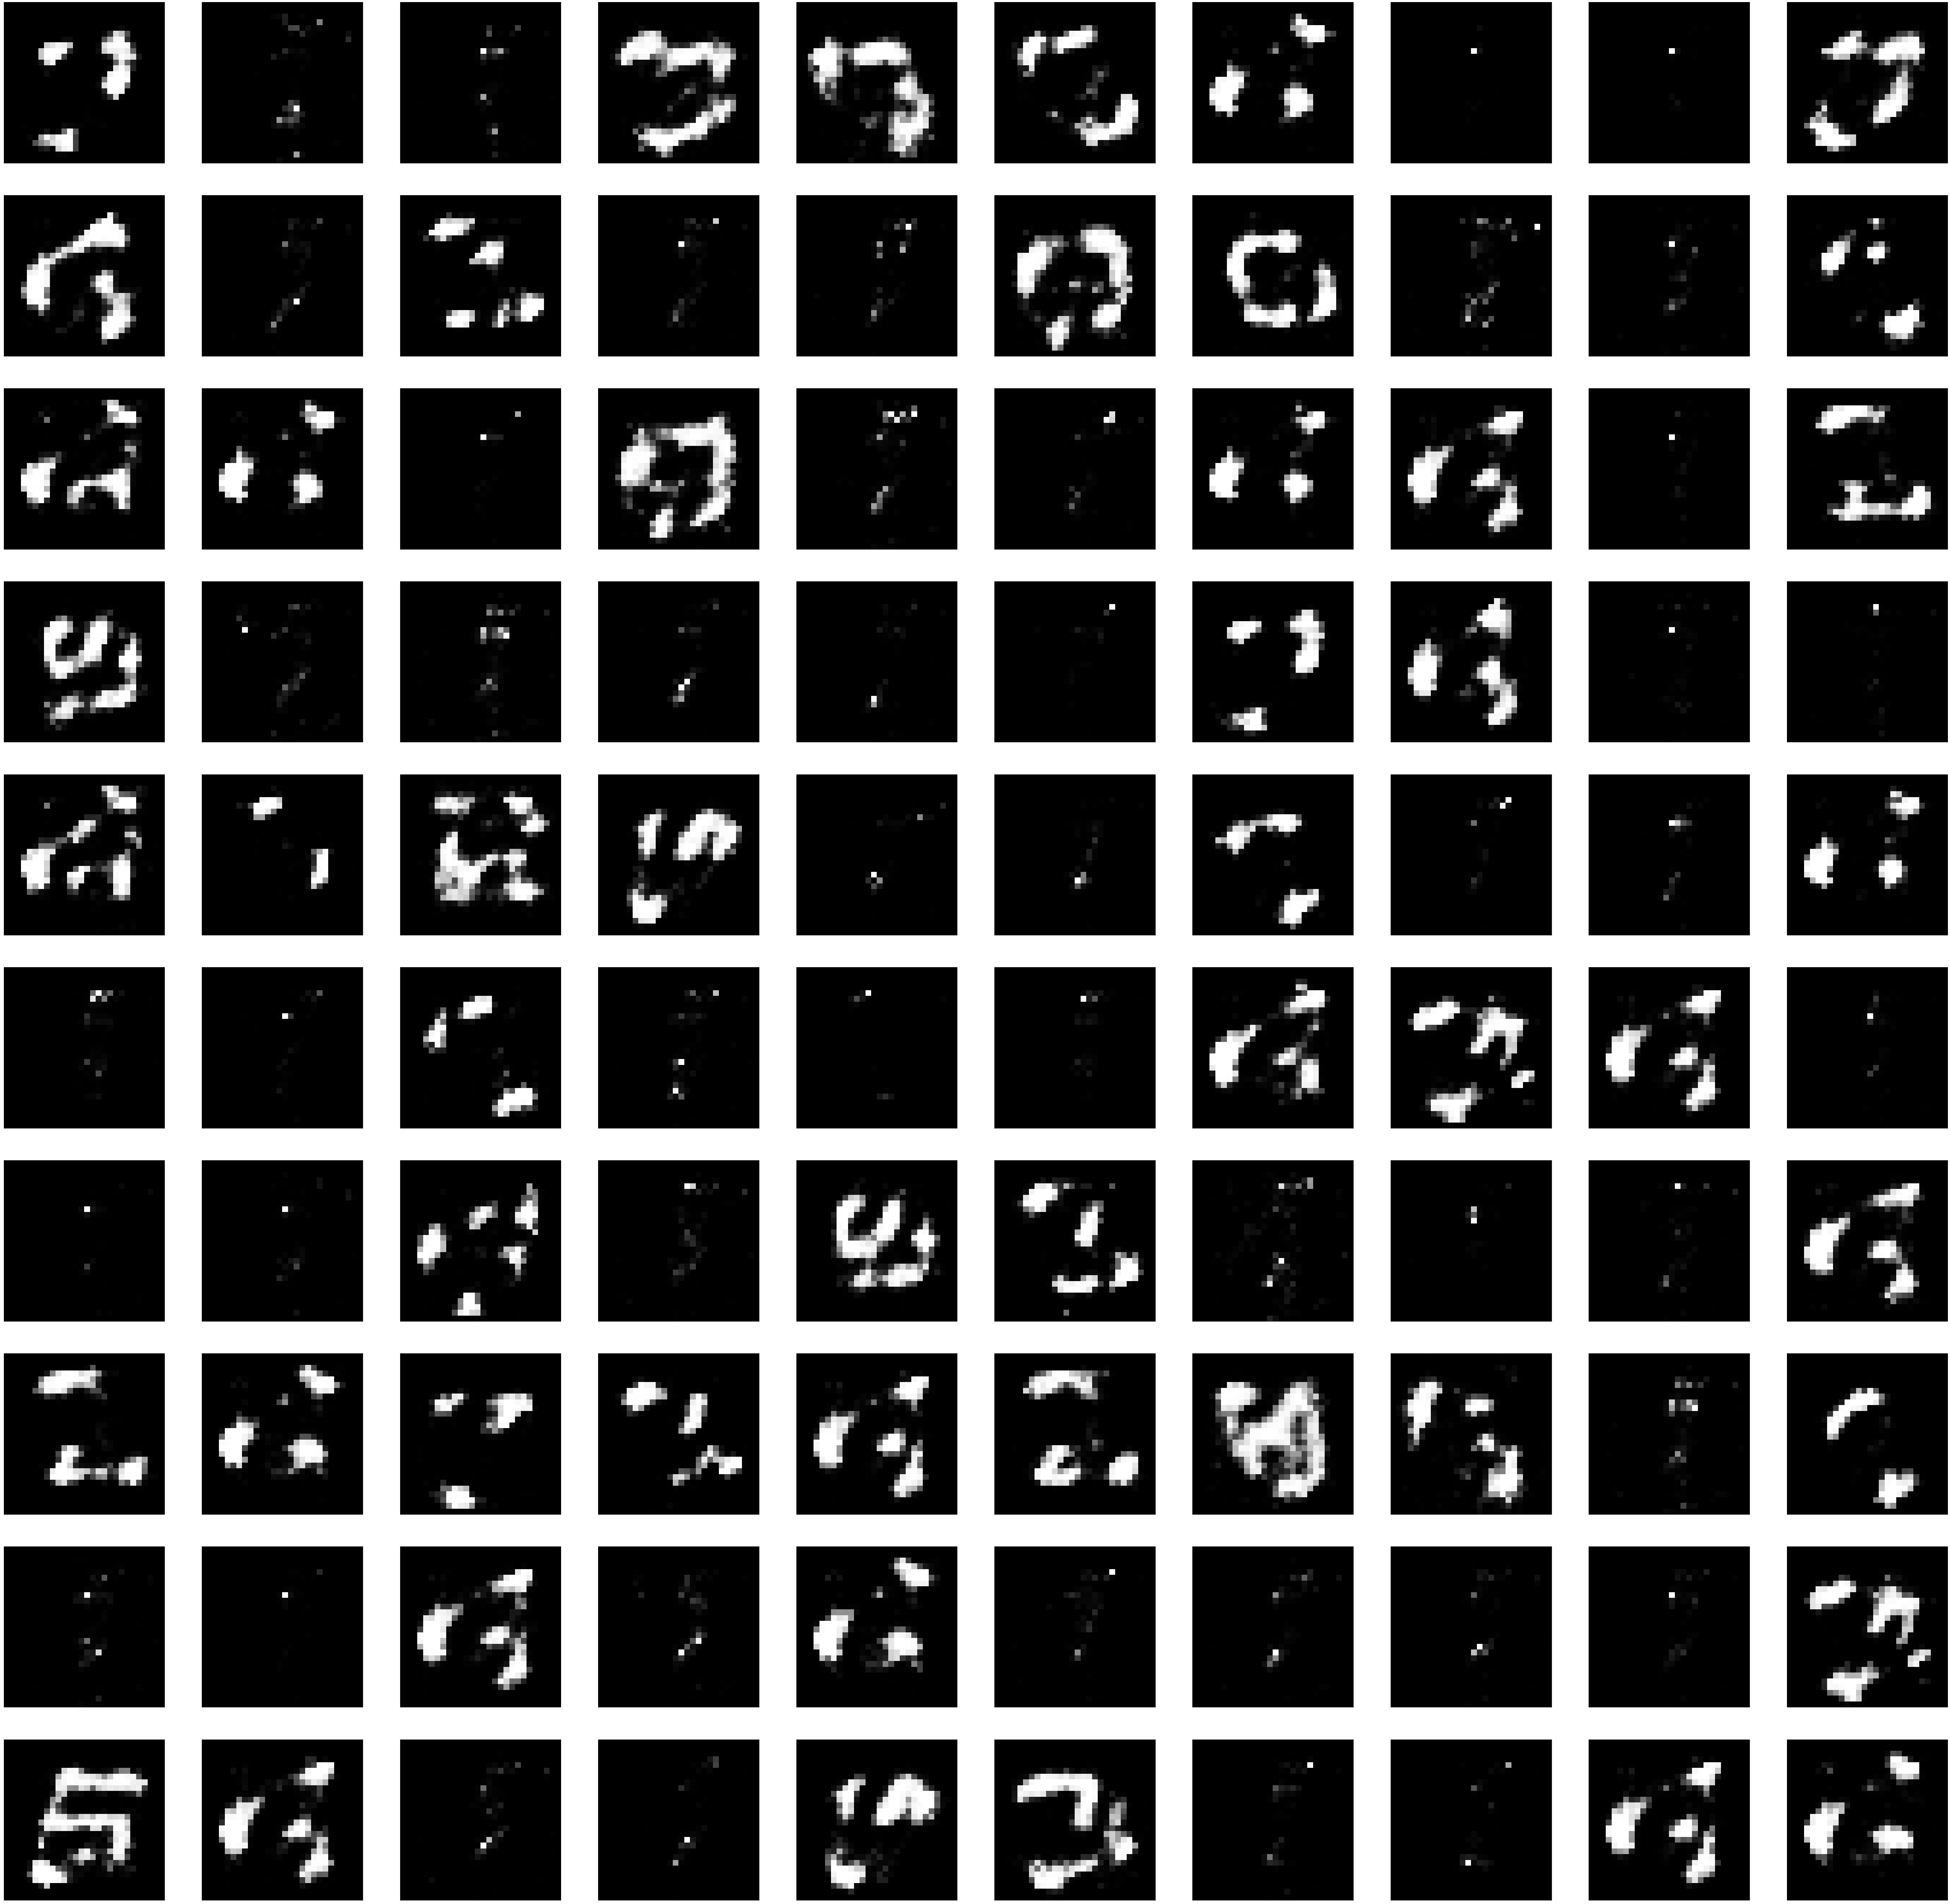

In [9]:
plot_images([sample_c1[i].reshape(28,28) for i in range(0,100)], path = None, cols=10, cmap='gray')

In [10]:
##2. To train the model with k=1 and then find the inference for the value of k>1001 for the above trained model and then print the images. 
rbm_c_2=RBM(n_visible=784, n_hidden=n_hidden, 
              k=1, lr=lr, max_epochs=100)
train_re_2,val_re_2=rbm_c_2.fit(X=train_X[300:1200], valid_X=valid_X[300:1200])
input_c=np.random.binomial(n=1, p=0.1,size=train_X[300:1200].shape)

## Parameters hidden =100 k=1,1001 lr =0.01 max_epoch=40  digits 1,2,3
   

Epoch 1 :: 	 Train Error 8.9976                   :: Valid Error 11.1858
Epoch 2 :: 	 Train Error 8.4085                   :: Valid Error 10.5464
Epoch 3 :: 	 Train Error 8.0165                   :: Valid Error 10.1399
Epoch 4 :: 	 Train Error 7.7642                   :: Valid Error 9.9116
Epoch 5 :: 	 Train Error 7.5477                   :: Valid Error 9.7497
Epoch 6 :: 	 Train Error 7.4042                   :: Valid Error 9.5554
Epoch 7 :: 	 Train Error 7.2575                   :: Valid Error 9.4945
Epoch 8 :: 	 Train Error 7.0973                   :: Valid Error 9.3176
Epoch 9 :: 	 Train Error 7.0103                   :: Valid Error 9.2343
Epoch 10 :: 	 Train Error 6.9160                   :: Valid Error 9.1604
Epoch 11 :: 	 Train Error 6.8307                   :: Valid Error 9.0767
Epoch 12 :: 	 Train Error 6.7483                   :: Valid Error 9.0532
Epoch 13 :: 	 Train Error 6.7144                   :: Valid Error 9.0124
Epoch 14 :: 	 Train Error 6.6328                   :: Val

In [11]:
sample_c2=[]
for i in range(0,100):
    h0, v0, h_sample, v_sample, h_prob, v_prob=rbm_c_2.gibbs_k(input_c[i], k=1001)
    sample_c2.append(v_prob)

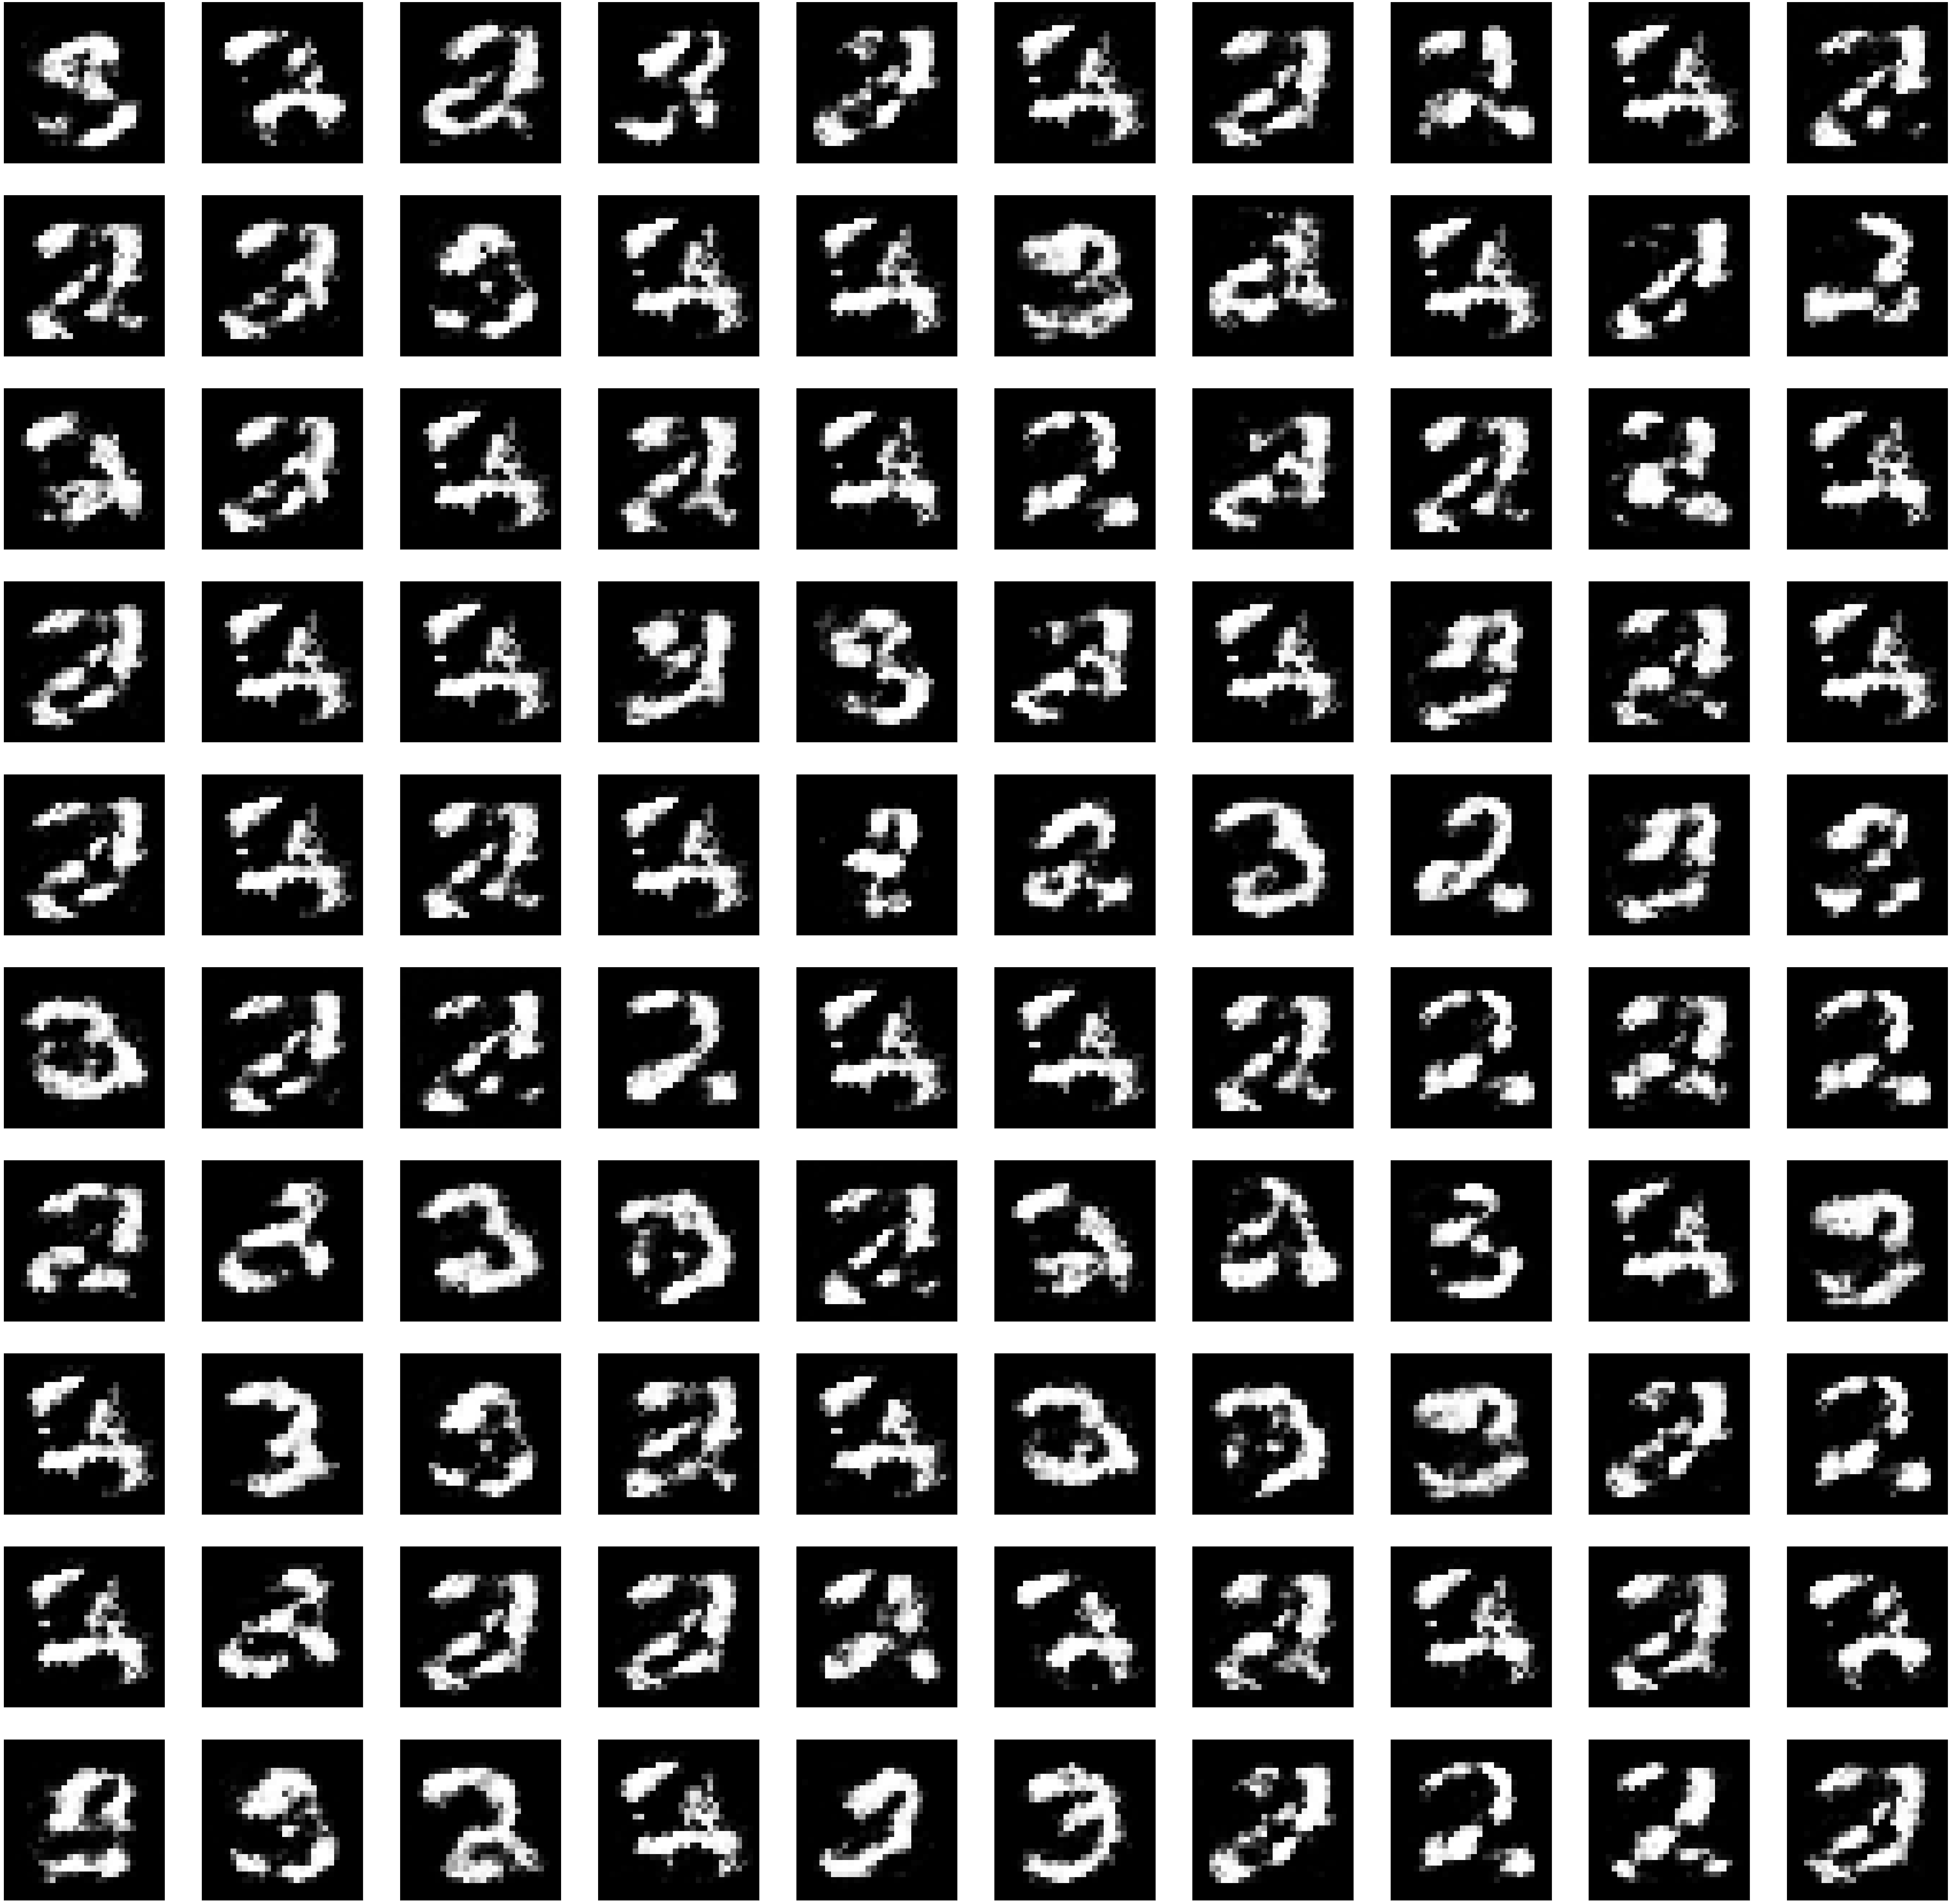

In [12]:
plot_images([sample_c2[i].reshape(28,28) for i in range(0,100)], path = None, cols=10, cmap='gray')

In [13]:
##3. To train the model with k=5 and then find the inference for the value of k>1001 for the above trained model and then print the images. 
rbm_c_3=RBM(n_visible=784, n_hidden=n_hidden, 
              k=5, lr=lr, max_epochs=100)
train_re_3,val_re_3=rbm_c_3.fit(X=train_X[300:1200], valid_X=valid_X[300:1200])
sample_c3=[]
for i in range(0,100):
    h0, v0, h_sample, v_sample, h_prob, v_prob=rbm_c_3.gibbs_k(input_c[i], k=1001)
    sample_c3.append(v_prob)
 ## Parameters hidden =100 k=5,1001 lr =0.01 max_epoch=40  digits 1,2,3
 

Epoch 1 :: 	 Train Error 9.5385                   :: Valid Error 11.9695
Epoch 2 :: 	 Train Error 9.1797                   :: Valid Error 11.1630
Epoch 3 :: 	 Train Error 8.7229                   :: Valid Error 10.7507
Epoch 4 :: 	 Train Error 8.4112                   :: Valid Error 10.5371
Epoch 5 :: 	 Train Error 8.2800                   :: Valid Error 10.2050
Epoch 6 :: 	 Train Error 8.0961                   :: Valid Error 10.1772
Epoch 7 :: 	 Train Error 8.0519                   :: Valid Error 10.1769
Epoch 8 :: 	 Train Error 7.9137                   :: Valid Error 9.9220
Epoch 9 :: 	 Train Error 7.8136                   :: Valid Error 9.9271
Epoch 10 :: 	 Train Error 7.7421                   :: Valid Error 9.8487
Epoch 11 :: 	 Train Error 7.6402                   :: Valid Error 9.8622
Epoch 12 :: 	 Train Error 7.6274                   :: Valid Error 9.8376
Epoch 13 :: 	 Train Error 7.5180                   :: Valid Error 9.7230
Epoch 14 :: 	 Train Error 7.4937                   ::

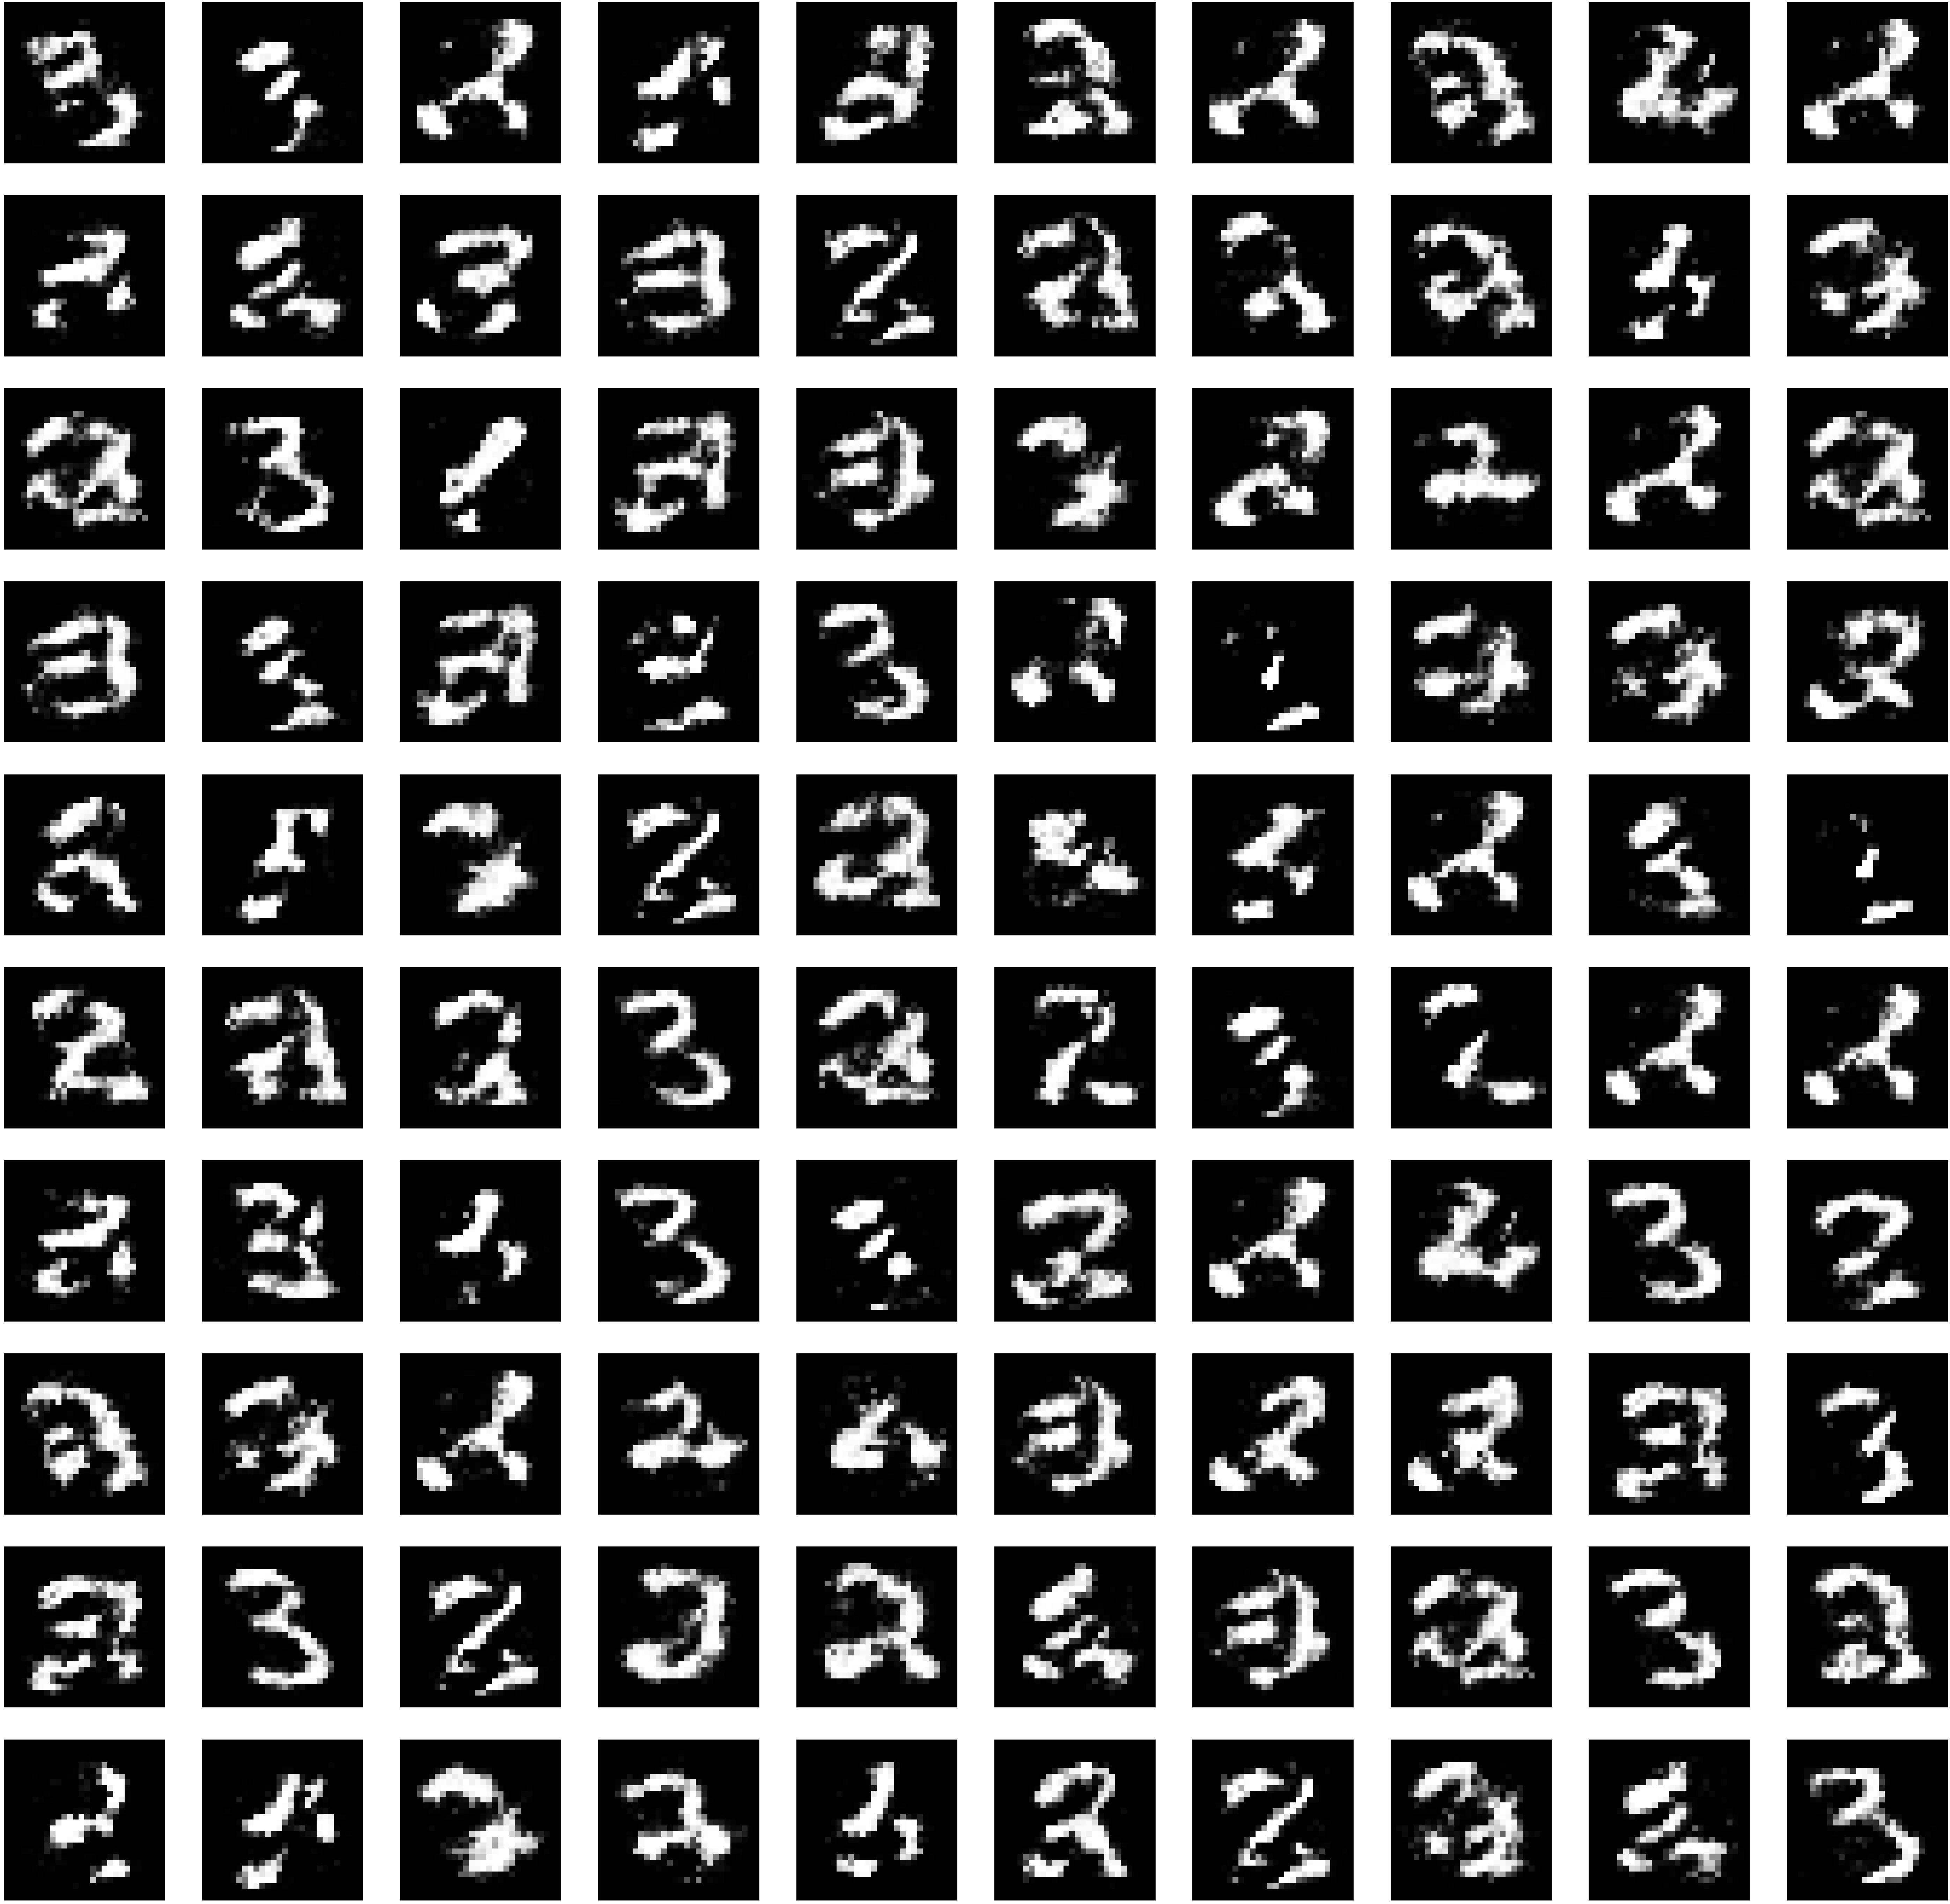

In [14]:
plot_images([sample_c3[i].reshape(28,28) for i in range(0,100)], path = None, cols=10, cmap='gray')

## d) Conditional Generation

Only reveal the top half of MNIST images (data generation code is provided to you), and use the RBM to reconstruct the bottom half of the image. Note here when you do gibbs sampling, when you sample $\bf v$ condition on $\bf h$, part of $\bf v$ is known for sure. You need to inject these known value to the newly sampled $\bf v$.

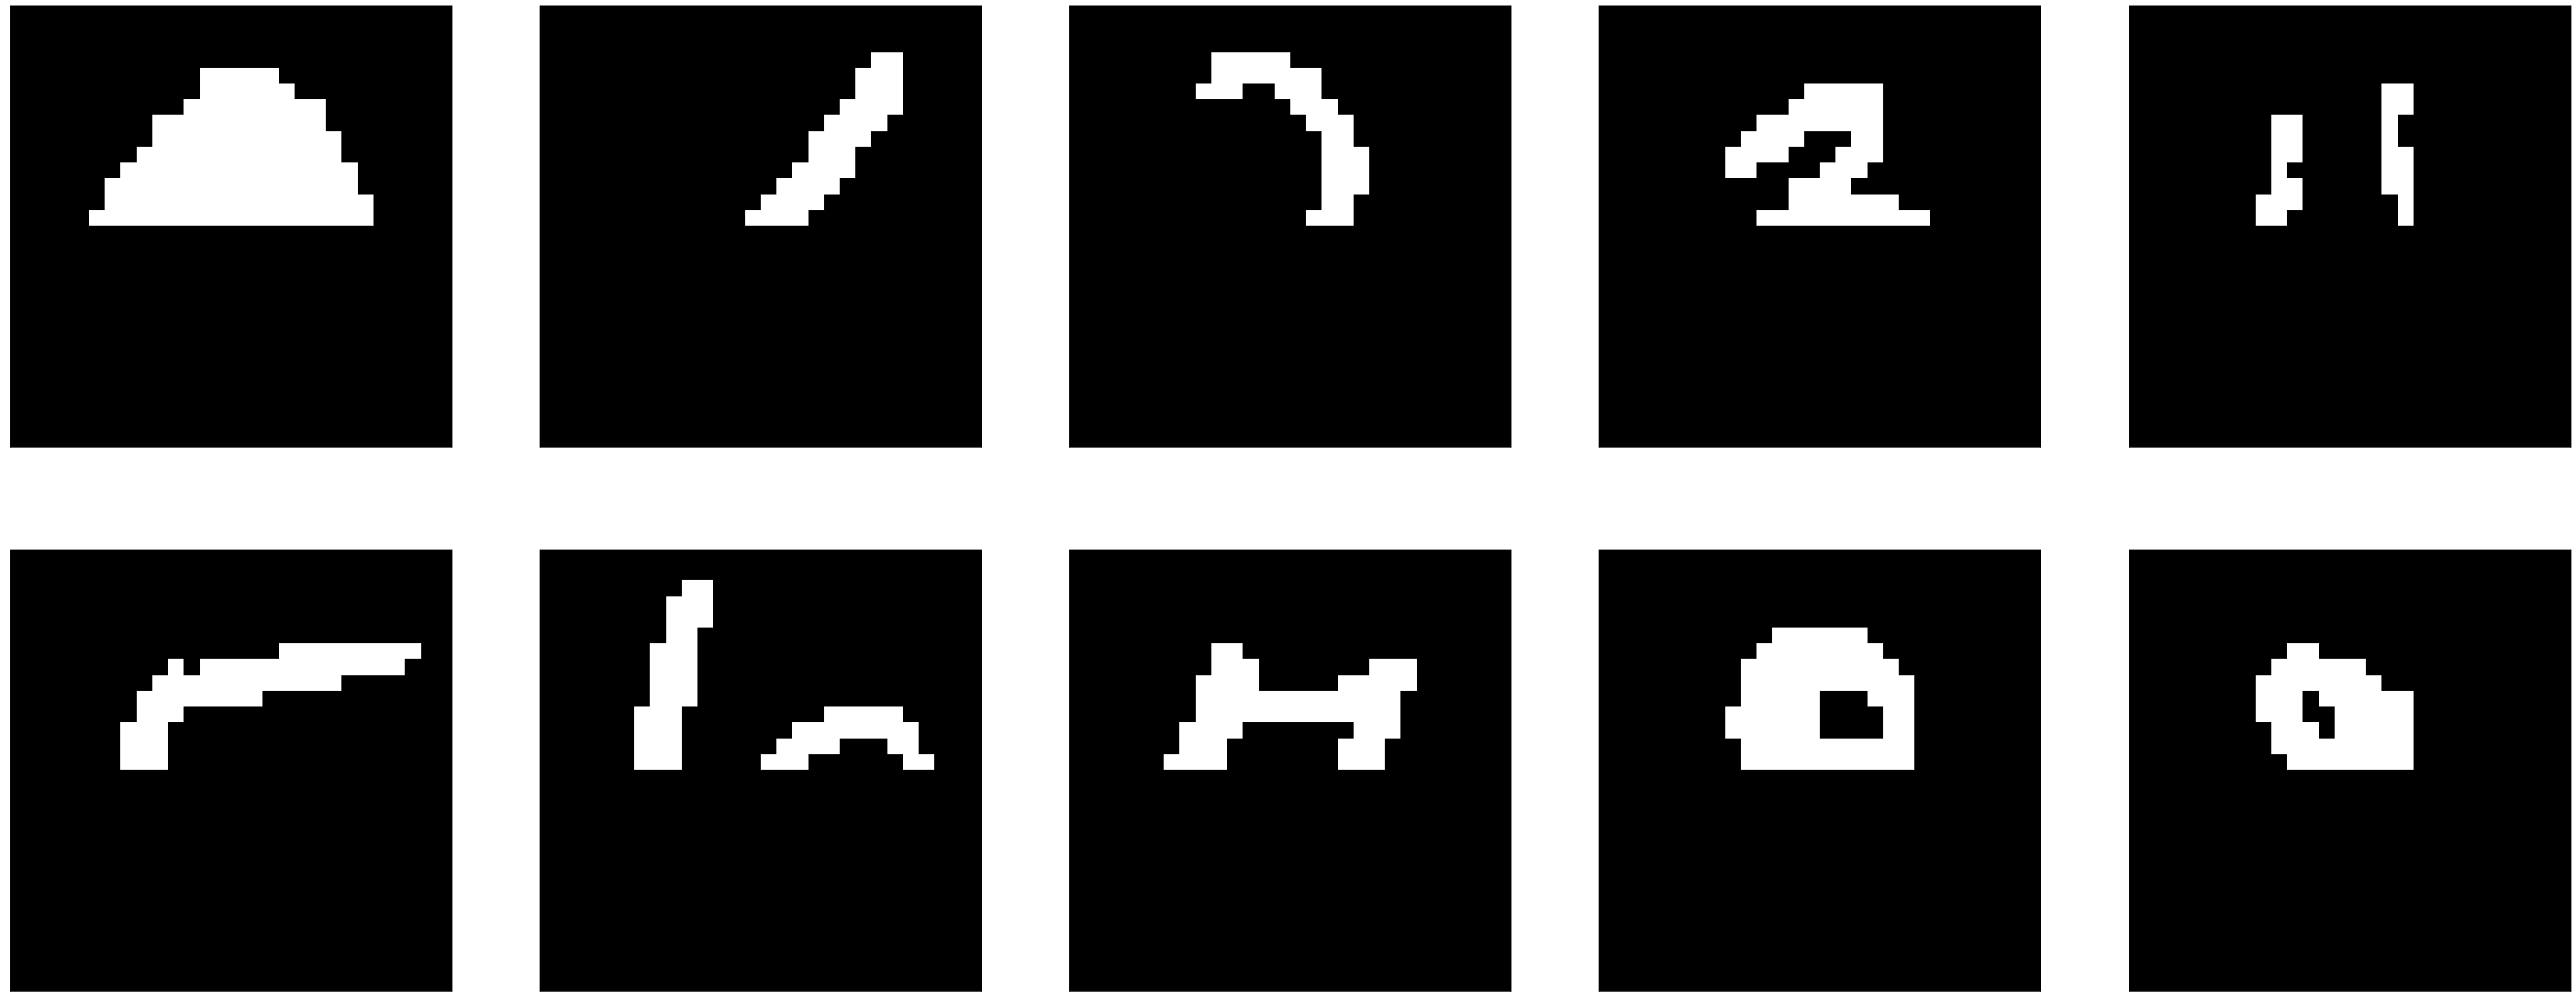

In [15]:
# ims = []
num_test = 10
mask = np.zeros((28, 28))
mask[0:14] = 1
mask_1d = mask.reshape(-1)
masked_X=[]
for i in range(num_test):
    masked_X.append(train_X[i*300])

plot_images([(x*mask_1d).reshape(28,28) for x in masked_X], path = None, cols=5, cmap='gray')

In [17]:
rbm_d=RBM(n_visible=784, n_hidden=n_hidden, 
              k=1, lr=lr, max_epochs=200)
train_re_d,val_re_d=rbm_c_3.fit(X=train_X, valid_X=valid_X)
## Parameters hidden =100 k=1,1001 lr =0.01 max_epoch=100  digits 1,2,3
 

Epoch 1 :: 	 Train Error 7.5283                   :: Valid Error 7.8218
Epoch 2 :: 	 Train Error 7.4977                   :: Valid Error 7.7858
Epoch 3 :: 	 Train Error 7.4894                   :: Valid Error 7.7675
Epoch 4 :: 	 Train Error 7.4919                   :: Valid Error 7.7815
Epoch 5 :: 	 Train Error 7.4307                   :: Valid Error 7.7244
Epoch 6 :: 	 Train Error 7.4686                   :: Valid Error 7.7556
Epoch 7 :: 	 Train Error 7.4508                   :: Valid Error 7.7606
Epoch 8 :: 	 Train Error 7.4819                   :: Valid Error 7.7678
Epoch 9 :: 	 Train Error 7.4446                   :: Valid Error 7.7278
Epoch 10 :: 	 Train Error 7.4051                   :: Valid Error 7.7060
Epoch 11 :: 	 Train Error 7.3537                   :: Valid Error 7.6597
Epoch 12 :: 	 Train Error 7.4028                   :: Valid Error 7.6981
Epoch 13 :: 	 Train Error 7.3488                   :: Valid Error 7.6552
Epoch 14 :: 	 Train Error 7.3174                   :: Valid 

In [21]:
sample_d=[]
input_d=np.random.binomial(n=1, p=0.2,size=np.array(masked_X).shape)

for i in range(num_test):
    h0, v0, h_sample, v_sample, h_prob, v_prob=rbm_d.gibbs_k(input_d[i], 10000,masked_X[i], mask_1d)
    sample_d.append(v_sample)

In [ ]:
# Conditioned on the observed pixels, complete the rest of the image
plot_images([sample_d[i].reshape(28,28) for i in range(0,10)], path = None, cols=5, cmap='gray')

## e) Supervised learning with RBM

Take the RBM you have trained and initialize a 2-layer neural network, of which the first layer's weights are initialized using the RBM's weight. Compare the training trajectory of this RBM-initialized network with a randomly initialized network. Does the RBM-initialized network converge faster? Plot the training loss of these two networks in one figure.

In [ ]:
rbm.W.shape
np.array(rbm_clf.coefs_).shape

In [ ]:
rbm.hbias.shape

In [ ]:
rbm = RBM(n_visible=784, n_hidden=300,  k=5, lr=0.01, max_epochs=40)
rbm.fit(X=train_X, valid_X=valid_X)


In [ ]:
rbm_clf = WarmUpMLPClassifier(lr=0.01, max_epochs=50, 
                               hidden_layer_sizes=(300,))
rbm_clf.fit(train_X, train_Y)

plt.plot(rbm_clf.loss_curve_)
plt.show()

# 2) DBN Task

Truncate our dataset and only retain images of digits $\textbf{7}, \textbf{8}$, and $\textbf{9}$.
Build a DBN with two hidden layers with 500 and 784 units respectively, so there are two RBMs with 500 and 784 hidden units.

## a) Training DBN
Training this DBN with gibbs steps $k=3$. For each RBM, plot reconstruction error against the epoch number for training and validation on one plot. So you should include 2 plots here, each contains two curves for training and validation.

In [ ]:
dbn_a = DBN(n_visible=784, layers=[500, 784], 
          k=3, max_epochs=100, lr=0.01)
te_2a,ve_2a=dbn_a.fit(X=train_X[-900:], valid_X=valid_X[-300:])

In [ ]:
te_2a[1]

In [ ]:
for i in range(2):
    plt.plot(range(40),te_2a[i],label='Train')
    plt.plot(range(40),ve_2a[i],label='Valid')
    plt.title('Reconstruction Error vs Epoch for dbm K=3 and rbm'+str(i+1))
    plt.xlabel('Epoch')
    plt.ylabel('Reconstruction Error')
    plt.legend()
    plt.show()

## b) Generation

Set $k>1000$ for this task. Display the 100 generated samples for digit images in one figure. Do they look like handwritten digits? 

In [ ]:
X_2b=train_X[-900:]
sample_2b2=[]
for i in range(len(X_2b)):
    v_final_prob,v_final_sample=dbn_a.infer(X_2b[i], k=1001)
    sample_2b2.append(v_final_sample)

In [ ]:
plot_images([sample_2b2[i*10].reshape(28,28) for i in range(0,90)], path = None, cols=10, cmap='gray')

In [ ]:
plt.imshow(sample_2b2[-200].reshape(28, 28), cmap='gray')